In [13]:
from db_connect import DB_CONFIG
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


/tmp/ipykernel_47417/11047994.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [100]:
# epoch 10, batchsize 32
df1032 = pd.read_csv('../Fish_model/Seafood_segment/train12/results.csv')
df1032.columns = df1032.columns.str.strip()
# epoch 10, batchsize 16
df1016 = pd.read_csv('../Fish_model/Seafood_segment/train16/results.csv')
df1016.columns = df1016.columns.str.strip()

# epoch 20, batchsize 32
df2032 = pd.read_csv('../Fish_model/Seafood_segment/train13/results.csv')
df2032.columns = df2032.columns.str.strip()
# epoch 20, batchsize 16
df2016 = pd.read_csv('../Fish_model/Seafood_segment/train17/results.csv')
df2016.columns = df2016.columns.str.strip()

# epoch 30, batchsize 32
df3032 = pd.read_csv('../Fish_model/Seafood_segment/train14/results.csv')
df3032.columns = df3032.columns.str.strip()
# epoch 30, batchsize 16
df3016 = pd.read_csv('../Fish_model/Seafood_segment/train18/results.csv')
df3016.columns = df3016.columns.str.strip()

# epoch 40, batchsize 32
df4032 = pd.read_csv('../Fish_model/Seafood_segment/train15/results.csv')
df4032.columns = df4032.columns.str.strip()
# epoch 40, batchsize 16
df4016 = pd.read_csv('../Fish_model/Seafood_segment/train19/results.csv')
df4016.columns = df4016.columns.str.strip()

# epoch 50, batchsize 16
df5016 = pd.read_csv('../Fish_model/Seafood_segment/train20/results.csv')
df5016.columns = df5016.columns.str.strip()

# epoch 100, batchsize 16
df0016 = pd.read_csv('../Fish_model/Seafood_segment/train21/results.csv')
df0016.columns = df0016.columns.str.strip()

# epoch 100, batchsize 8
df0008 = pd.read_csv('../Fish_model/Seafood_segment/train22/results.csv')
df0008.columns = df0008.columns.str.strip()

In [97]:


df = pd.read_csv('../Fish_model/Seafood_segment/train19/results.csv')
df.columns = df.columns.str.strip()
len(df['epoch'])



40

In [101]:
def add_subplot(xlabel, ylabel, title) :
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

def score(df) :
    df.columns = df.columns.str.strip()
    epochs = df['epoch']
    seg_loss = df['val/seg_loss']
    cls_loss = df['val/cls_loss']
    dfl_loss = df['val/dfl_loss']
    precision = df['metrics/precision(M)']
    recall = df['metrics/recall(M)']
    mAP95 = df['metrics/mAP50-95(M)']
    return epochs, seg_loss, cls_loss, dfl_loss, precision, recall, mAP95

def plot_training_results():
    plt.figure(figsize=(24, 5))

    plt.subplot(1, 6, 1)
    plt.plot(df12['epoch'], df12['val/seg_loss'], label='train12')
    plt.plot(df13['epoch'], df13['val/seg_loss'], label='train13')
    plt.plot(df14['epoch'], df14['val/seg_loss'], label='train14')
    plt.plot(df15['epoch'], df15['val/seg_loss'], label='train15')
    add_subplot('Epoch', 'Loss', 'seg_loss')

    plt.subplot(1, 6, 2)
    plt.plot(df12['epoch'], df12['val/cls_loss'], label='train12')
    plt.plot(df13['epoch'], df13['val/cls_loss'], label='train13')
    plt.plot(df14['epoch'], df14['val/seg_loss'], label='train14')
    plt.plot(df15['epoch'], df15['val/seg_loss'], label='train15')
    add_subplot('Epoch', 'mAP', 'cls_loss')

    plt.subplot(1, 6, 3)
    plt.plot(df12['epoch'], df12['val/dfl_loss'], label='train12')
    plt.plot(df13['epoch'], df13['val/dfl_loss'], label='train13')
    plt.plot(df14['epoch'], df14['val/dfl_loss'], label='train14')
    plt.plot(df15['epoch'], df15['val/dfl_loss'], label='train15')
    add_subplot('Epoch', 'mAP', 'dfl_loss')

    plt.subplot(1, 6, 4)
    plt.plot(df12['epoch'], df12['metrics/precision(M)'], label='train12')
    plt.plot(df13['epoch'], df13['metrics/precision(M)'], label='train13')
    plt.plot(df14['epoch'], df14['metrics/precision(M)'], label='train14')
    plt.plot(df15['epoch'], df15['metrics/precision(M)'], label='train15')
    add_subplot('Epoch', 'Loss', 'precision')

    plt.subplot(1, 6, 5)
    plt.plot(df12['epoch'], df12['metrics/recall(M)'], label='train12')
    plt.plot(df13['epoch'], df13['metrics/recall(M)'], label='train13')
    plt.plot(df14['epoch'], df14['metrics/recall(M)'], label='train14')
    plt.plot(df15['epoch'], df15['metrics/recall(M)'], label='train15')
    add_subplot('Epoch', 'mAP', 'recall')

    plt.subplot(1, 6, 6)
    plt.plot(df12['epoch'], df12['metrics/mAP50-95(M)'], label='train12')
    plt.plot(df13['epoch'], df13['metrics/mAP50-95(M)'], label='train13')
    plt.plot(df14['epoch'], df14['metrics/mAP50-95(M)'], label='train14')
    plt.plot(df15['epoch'], df15['metrics/mAP50-95(M)'], label='train15')
    add_subplot('Epoch', 'mAP', 'mAP50-95')

    plt.tight_layout()
    plt.show()

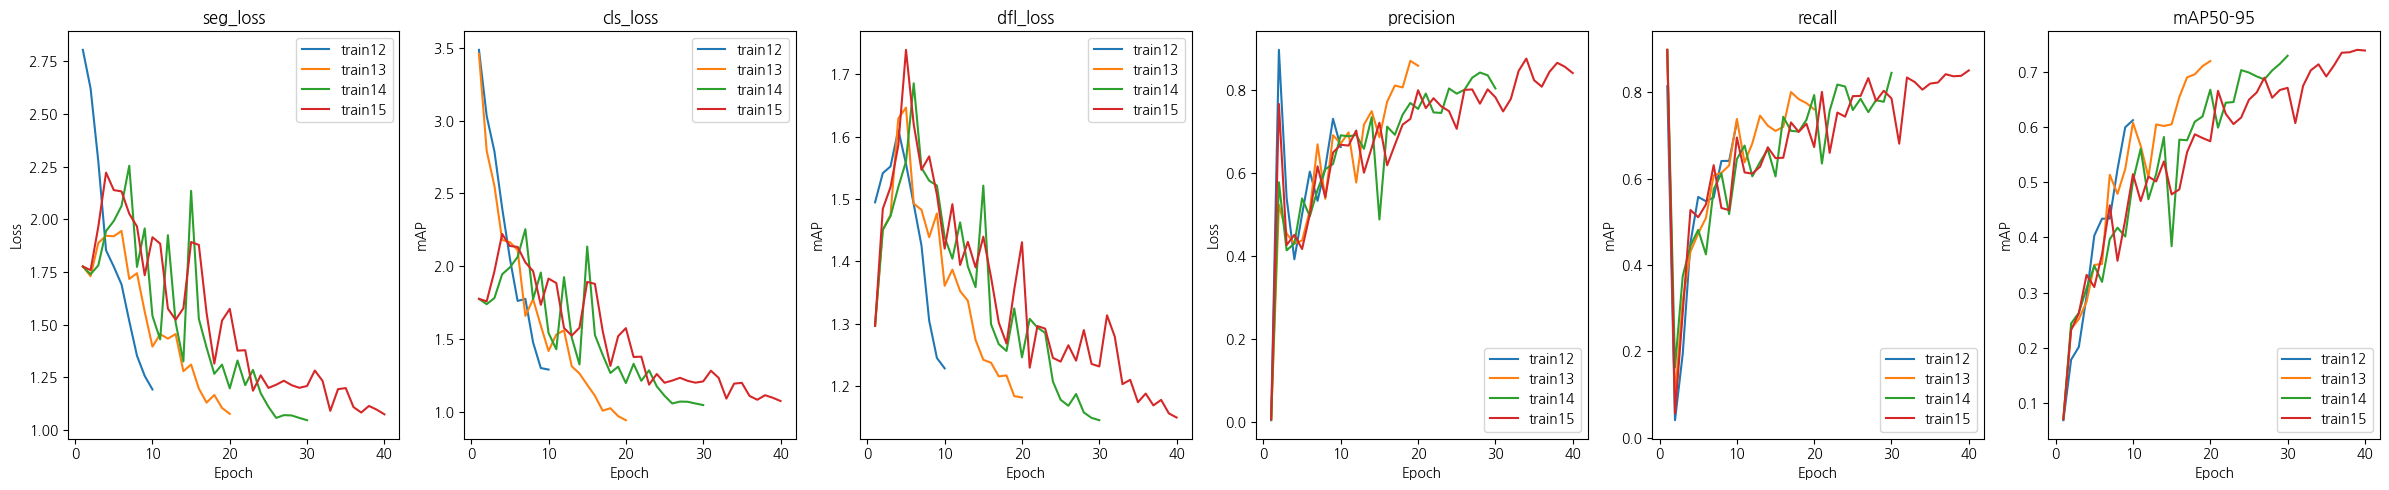

In [102]:
plot_training_results()